
# Project: Investigate TMDb Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


## Introduction
This data set includes information of about 10,000 movies from The Movie Database (TMDb) from Year 1961 to 2015. It includes variables like movie budget, ratings , genres and revenue, release year and date.

In [1]:
#import packages to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

##### 1. Reading the Movie dataset

In [3]:
# Load your data  Perform operations to inspect data
link="https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv"
df=pd.read_csv(link)

##### 2. Read the first five rows of the dataset

In [4]:
#print out first 5 lines
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


##### 3. Check the number of columns and rows

In [5]:
#check column and rows
df.shape

(10866, 21)

##### 4. Print the summary of the movie dataset

In [6]:
#check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

##### 5. Generate descriptive statistics

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


##### 6. Check for the number of missing data

In [8]:
#Check for missing data
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


### Data Cleaning

##### 1. Drop columns that would not be needed in analysis

In [9]:
#drop unnecessary columns
drop=['id', 'imdb_id', 'homepage', 'tagline', 'overview', 'keywords']
for i in drop:
    df.drop(columns=i, axis=1, inplace=True)

Check if the code worked

In [10]:
#check the outcome
df.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


##### 2. Check and drop duplicate rows

In [11]:
#Check for duplicates
df.duplicated().sum()

1

In [12]:
#drop duplicates
df.drop_duplicates(keep='first', inplace=True)

Duplicates can affect the outcome of an analysis.
The data had one duplicated row which was removed.

##### 3. Change some column data type

In [13]:
#change budge_adj and revenue-adj from float to int
adj=['budget_adj', 'revenue_adj']

for i in adj:
    df[i]=df[i].astype(int)

In [14]:
#change release_date from object to date
df['release_date']=df['release_date'].astype('datetime64[ns]')

##### 4. Calculate the profit

In [15]:
#calculate the profit
df['Profit']=df['revenue_adj']-df['budget_adj']

#Check if the above codes worked
df.head(2)

<a id='eda'></a>
## Exploratory Data Analysis



### 1. What is the Average profit over the the years?



#### Create a function to create the mean

In [16]:
# definding a function to calculate the mean for column2 and groupby by column1
def mean_groupby(column1,column2):
    mean_average = df.groupby(column1)[column2].mean()
    return mean_average

#### Creating a bar_graph function

In [17]:
def bar_graph(x):
    bar_plot=x.plot(figsize=(10,8), kind='bar', color='g')
    return bar_plot
    

#### Creating a line graph function


In [33]:
def line_graph(x):
    line_plot=x.plot(figsize=(10,8), kind='line', color='b')
    return line_plot

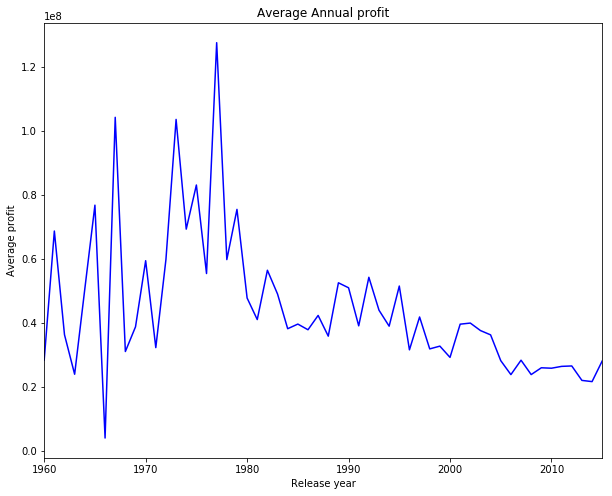

In [35]:
#Calculate the average yearly profit
avg_profit=mean_groupby('release_year', 'Profit')

#plot line
line_graph(avg_profit)
plt.ylabel('Average profit')
plt.xlabel('Release year')
plt.title('Average Annual profit');


The average annually Profit made in the movie industry peaked in late 1970s and it has been on a decreasing trend over since


### 2. What are the top 10 most profitable movies of all time?

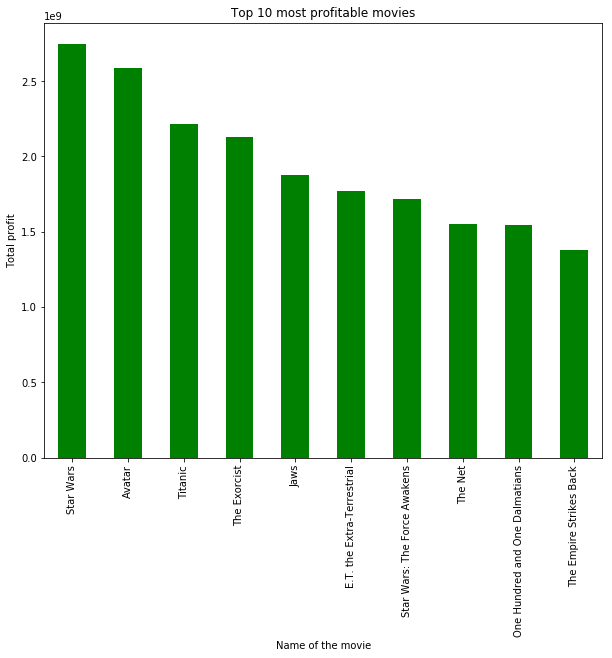

In [19]:
ax=df.groupby('original_title')['Profit'].sum().sort_values(ascending=False).head(10)
#ax.plot(figsize=(10, 8), kind='bar', color='g', )
bar_graph(ax)
plt.ylabel('Total profit')
plt.xlabel('Name of the movie')
plt.title("Top 10 most profitable movies");

### 3. Which genres are most popular from year to year?


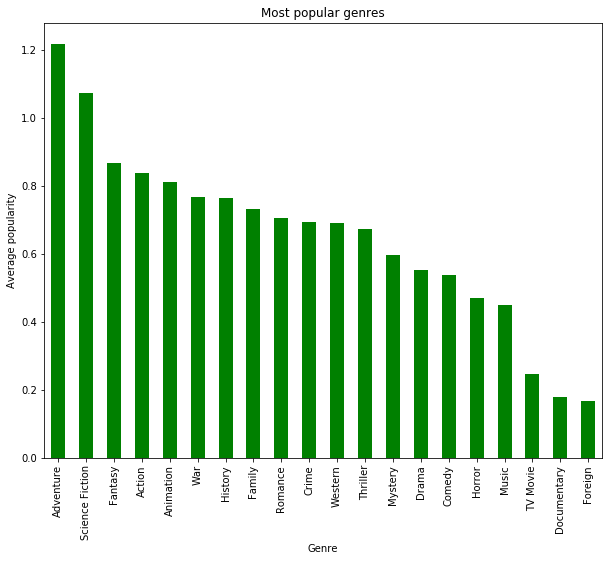

In [27]:
#create a main genre column and making the first as the main genre
df['Main_genre']=df['genres'].str.split('|', expand=True)[0]

#Calculate the mean of genres as sort the values from the largest 
ax=mean_groupby('Main_genre', 'popularity').sort_values(ascending=False)
#plot the bar graph
bar_graph(ax)
#labels
plt.xlabel('Genre')
plt.ylabel('Average popularity')
plt.title("Most popular genres");

The most popular genre is Adventure followed by Science fiction with documentaries and Foregn movies being the least popular

### 4. What is the trend for number of movies produced over the years?

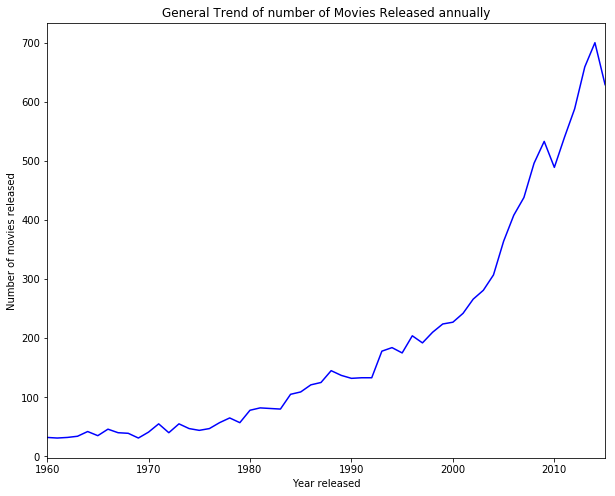

In [36]:
#get the count of movies per year
ax=df.groupby('release_year')['original_title'].count()
#plot a line graph to show the trend
line_graph(ax)
plt.xlabel('Year released')
plt.ylabel('Number of movies released')
plt.title('General Trend of number of Movies Released annually');

 There has been a steady increase in the number of movies made each year.

### 5. What is the distribution of watchtime for movies?

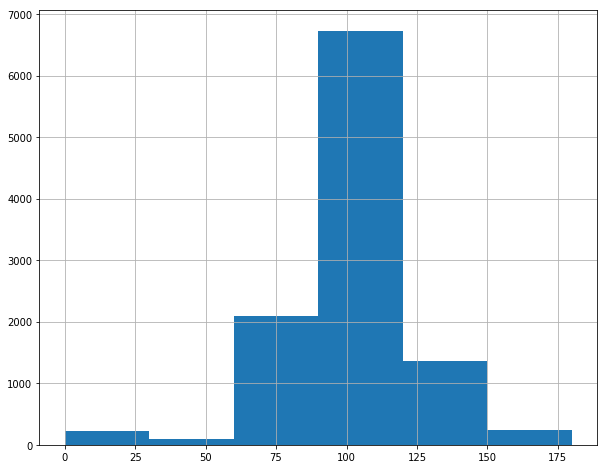

In [22]:
df['runtime'].hist(figsize=(10, 8), bins=[0, 30, 60, 90, 120, 150, 180]);

Most movies have a watch time of between 80 to 120 minutes

### 6. What is the Average Length of movie per genre?

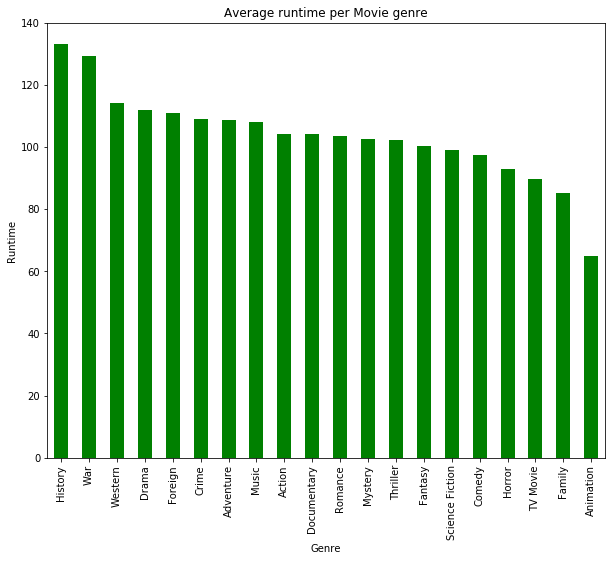

In [28]:
#Calculate the average runtime per genre
Mean_runtime=mean_groupby('Main_genre', 'runtime').sort_values(ascending=False)

#plot
bar_graph(Mean_runtime)
#labels
plt.ylabel('Runtime')
plt.xlabel('Genre')
plt.title('Average runtime per Movie genre');

In [ ]:
Historical movies tend ro have the longest runtimes while animations are the shortest films on average.

# Correlations

### 7. What is the relationship between budget and popularity?

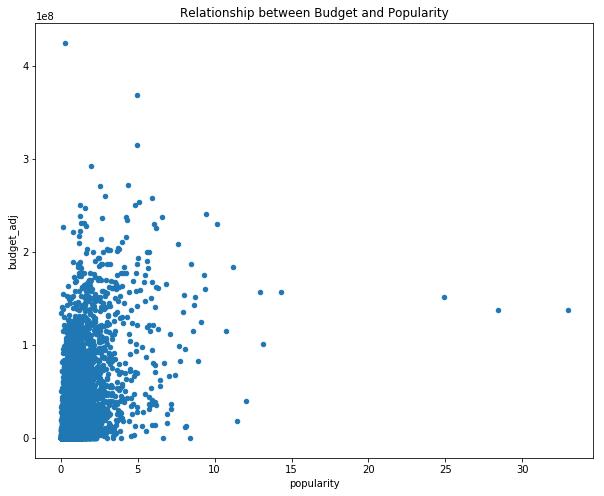

In [24]:
#plot popularity against budget
df.plot(figsize=(10, 8), kind='scatter',  x='popularity', y='budget_adj')
plt.title("Relationship between Budget and Popularity");

There is a positive correlation between Budget and popularity meaning expensive movies are most likely popular

### 8. What is the relationship between and popularity and ratings?


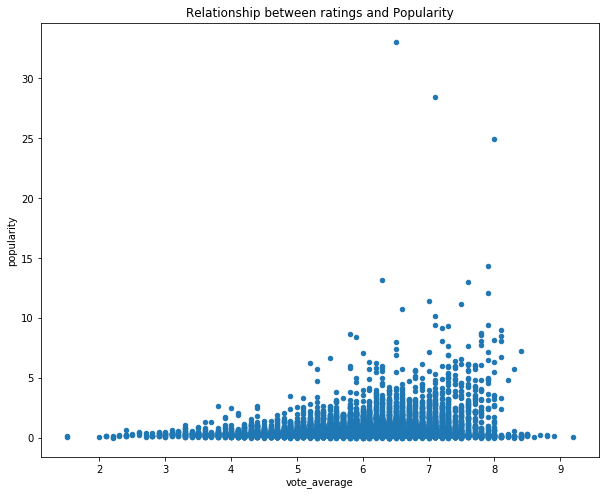

In [25]:
#plot ratings agaist popularity
df.plot(figsize=(10, 8), kind='scatter',  y='popularity', x='vote_average')
plt.title("Relationship between ratings and Popularity");

There is a postive correlation between popularity and ratings, meaning the more popular a movie is the more likely it is to receive high ratings.

<a id='conclusions'></a>
## Conclusions

- The higher the budget of a movie the more likely it will be popular among people.
- Annual profits are declining because the number of movies being released is increasing. Keep in mind that not every movie will be profitable. This means the average annual profit keeps declining.
- Movies with higher budgets are more likely to be popular than those with lower budgets.
- Number of movies released annually keeps increasing.
- Historical movies are the longest while animations are the shortest on average

## Limitation
- Missing data can affect the end results.

In [26]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0